In [46]:
import pandas as pd
file_path = 'picture_data_image.csv'
df = pd.read_csv(file_path)
print(df.shape)
df = df.dropna(subset=['poster_path'])
print(df.shape)
df = df[df['R'] != -1]
print(df.shape)


(432752, 15)
(358855, 15)
(358840, 15)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import csv
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
import re
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
import joblib
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder
import itertools
import time






def naiveB(test_x,train_x,train_y,test_y):


    clf = GaussianProcessRegressor()
    clf.fit(train_x, train_y)
    predict = clf.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('________________Результаты модели_________________')
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('R2 Score:', r2)



def LinearRegressionModel(test_x, train_x, train_y, test_y, name):
    best_model = None
    best_features = []
    best_mse = float('inf')

    for n_features in range(1, len(train_x.columns) + 1):
        for feature_set in itertools.combinations(train_x.columns, n_features):
            X_train_subset = train_x[list(feature_set)]
            X_test_subset = test_x[list(feature_set)]

            lr = LinearRegression()
            lr.fit(X_train_subset, train_y)
            lr.fit(X_train_subset, train_y)

            predict = lr.predict(X_test_subset)

            mse = mean_squared_error(test_y, predict)
            mae = mean_absolute_error(test_y, predict)
            r2 = r2_score(test_y, predict)

            print(f"Testing features: {feature_set}")
            print(f"Mean Squared Error: {mse}")
            print(f"Mean Absolute Error: {mae}")
            print(f"R2 Score: {r2}")
            print("-" * 40)

            if mse < best_mse:
                best_mse = mse
                best_model = lr
                best_features = feature_set

    joblib.dump(best_model, name)
    print(f"Best model saved with features {best_features} as {name}")
    return best_features

def SVR_alg(test_x, train_x, train_y, test_y, name):
    param_grid = {
        'kernel': ['poly'],
        'degree': [2, 3],
        'C': [0.1, 1, 10],
        'coef0': [0, 1]
    }
    grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    best_params = grid_search.best_params_
    print(f'Best parameters: {best_params}')

    clf = SVR(
        kernel=best_params['kernel'],
        degree=best_params['degree'],
        C=best_params['C'],
        coef0=best_params['coef0']
    )

    clf.fit(train_x, train_y)

    predict = clf.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('________________Результаты модели_________________')
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('R2 Score:', r2)
    print('________________Опорные вектора_________________')
    support_vectors = clf.support_
    print('Количество опорных векторов:', len(support_vectors))

    joblib.dump(clf, name)  
    print(f'Model saved as {name}')


def KNN_alg(test_x, train_x, train_y, test_y,name):

    param_grid = {'n_neighbors': np.arange(40, 100, 30)} 
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    best_n_neighbors = grid_search.best_params_['n_neighbors']
    print(f'Best number of neighbors: {best_n_neighbors}')

    knn = KNeighborsRegressor(n_neighbors=best_n_neighbors)
    knn.fit(train_x, train_y)

    predict = knn.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print('R2 Score:', r2)
    joblib.dump(knn, name)  
    print(f'Model saved as {name}')

def RandomForest(test_x, train_x, train_y, test_y, name):
    param_grid = {'n_estimators': np.arange(3, 7, 4)} 
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    best_n_estimators = grid_search.best_params_['n_estimators']
    print(f'Best number of estimators: {best_n_estimators}')

    rfr = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
    rfr.fit(train_x, train_y)

    predict = rfr.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('Random Forest - Mean Squared Error:', mse)
    print('Random Forest - Mean Absolute Error:', mae)
    print('Random Forest - R2 Score:', r2)

    joblib.dump(rfr, name)  
    print(f'Model saved as {name}')
label_encoder = LabelEncoder()
df['Temperature'] = label_encoder.fit_transform(df['Temperature'])
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

X = df[[ 'R', 'G', 'B', 
        'H', 'S', 'V', 'Max_Contrast', 'Av_Contrast', 
        'Average_Brightness', 'Max_Brightness', 'Temperature']]
Y=df['averageRating']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_test)
start_time = time.time()
cols=LinearRegressionModel(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='linear_picture.joblib')
print(f"LinearRegressionModel time: {time.time() - start_time} seconds")
print()
model = joblib.load('linear_picture.joblib')
print(type(cols))
predict = model.predict(X_test[list(cols)])

mse = mean_squared_error(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
r2 = r2_score(Y_test, predict)

print('Linear - Mean Squared Error:', mse)
print('Linear - Mean Absolute Error:', mae)
print('Linear - R2 Score:', r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
# # KNN_alg
# start_time = time.time()
# KNN_alg(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='knn_picture.joblib')
# print(f"KNN_alg time: {time.time() - start_time} seconds")
# print()
# # RandomForest
# start_time = time.time()
# SVR_alg(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='svr_picture.joblib')
# print(f"SVR_alg time: {time.time() - start_time} seconds")
# print()

# start_time = time.time()
# RandomForest(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='forest_picture.joblib')
# print(f"RandomForest time: {time.time() - start_time} seconds")
# print()
# # SVR_alg

# start_time = time.time()
# naiveB(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='baies_picture.joblib')
# print(f"NaiveB time: {time.time() - start_time} seconds")
# print()
# # SVR_alg



Cool: 0
Warm: 1
          R    G    B    H    S    V  Max_Contrast  Av_Contrast  \
65977   138  142  137   54    9  142     18.469013     4.605987   
4634    156  134   60   23  157  156     14.701908     5.117483   
4775    164   93  126  166  110  164     15.340736     4.435178   
18536   164  139  118   14   72  164     18.809367     5.369761   
69383   118  119  147  119   50  147     16.561326     5.036532   
...     ...  ...  ...  ...  ...  ...           ...          ...   
121061  135  140  107   35   60  140     16.612579     3.982792   
17950   167  106   97    4  107  167     17.646325     4.805073   
11139    83  102  146  111  110  146     16.294671     4.926684   
29835   140  137  139  160    5  140     13.725185     4.008025   
35312   100   96   93   13   18  100     13.786895     4.533127   

        Average_Brightness  Max_Brightness  Temperature  
65977             0.368792        0.901075            1  
4634              0.354900        0.762335            1  
4775 

(432752, 15)
(358855, 15)
(358840, 15)
                           R         G         B         H         S  \
R                   1.000000  0.546171  0.142273 -0.257940  0.290776   
G                   0.546171  1.000000  0.673408 -0.098237 -0.294257   
B                   0.142273  0.673408  1.000000  0.348561 -0.624282   
H                  -0.257940 -0.098237  0.348561  1.000000 -0.226816   
S                   0.290776 -0.294257 -0.624282 -0.226816  1.000000   
V                   0.896269  0.651823  0.344868 -0.138647  0.346748   
Max_Contrast        0.018561  0.047495  0.065780 -0.027718 -0.137284   
Av_Contrast        -0.046630  0.023494  0.012681 -0.059010 -0.144736   
Average_Brightness  0.720966  0.920302  0.597048 -0.113382 -0.138652   
Max_Brightness      0.447367  0.577813  0.474430 -0.028400 -0.216534   
averageRating      -0.031210  0.043560  0.051402  0.003026 -0.064103   

                           V  Max_Contrast  Av_Contrast  Average_Brightness  \
R                

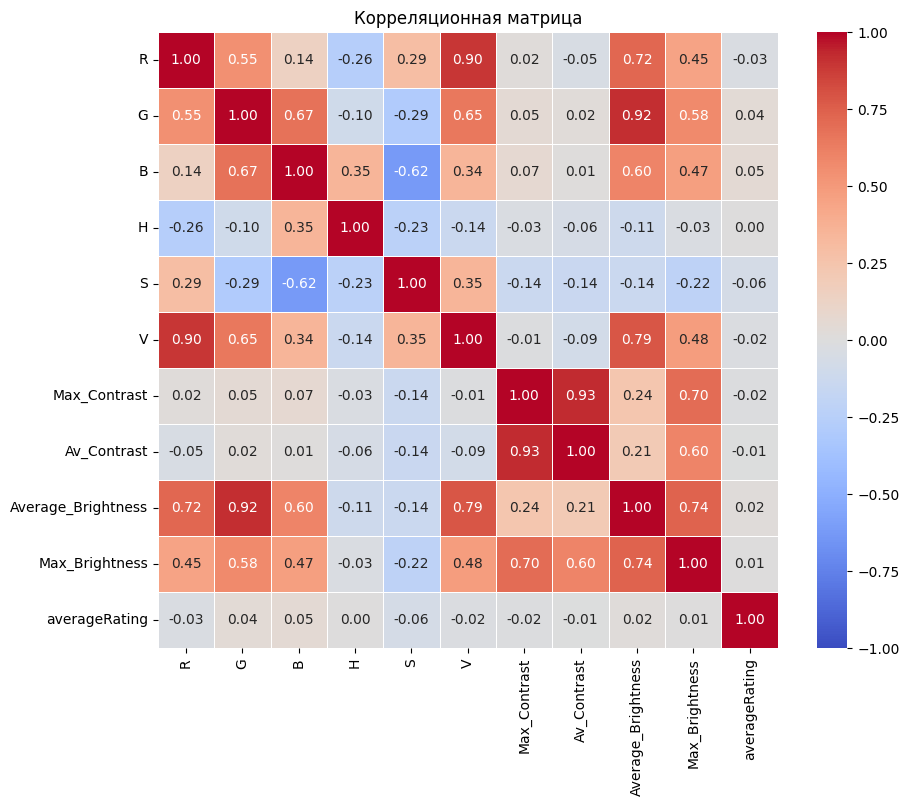

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'picture_data_image.csv'
df = pd.read_csv(file_path)
print(df.shape)
df = df.dropna(subset=['poster_path'])
print(df.shape)
df = df[df['R'] != -1]
print(df.shape)
df = df[[ 'R', 'G', 'B', 
        'H', 'S', 'V', 'Max_Contrast', 'Av_Contrast', 
        'Average_Brightness', 'Max_Brightness', 'averageRating']]
correlation_matrix = df.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()

(432752, 15)
(358855, 15)
(358840, 15)


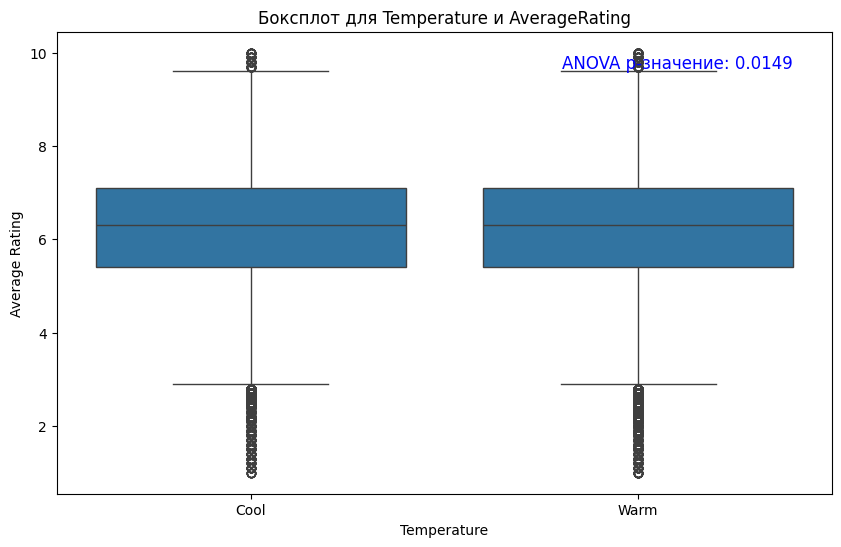

ANOVA p-значение: 0.0149


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway  

file_path = 'picture_data_image.csv'
df = pd.read_csv(file_path)
print(df.shape)

df = df.dropna(subset=['poster_path'])
print(df.shape)
df = df[df['R'] != -1]
print(df.shape)

df['Temperature'] = df['Temperature'].astype(str)

categories = df['Temperature'].unique()
groups = [df[df['Temperature'] == category]['averageRating'] for category in categories]

f_statistic, p_value = f_oneway(*groups)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Temperature'], y=df['averageRating'])

plt.title('Боксплот для Temperature и AverageRating')
plt.xlabel('Temperature')
plt.ylabel('Average Rating')

plt.text(0.95, 0.95, f'ANOVA p-значение: {p_value:.4f}', horizontalalignment='right',
         verticalalignment='top', transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.show()

print(f'ANOVA p-значение: {p_value:.4f}')


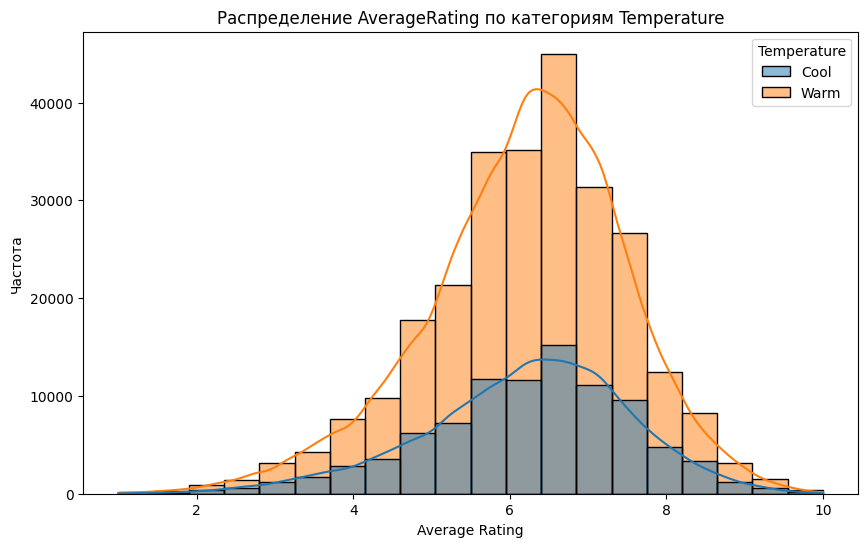

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='averageRating', hue='Temperature', kde=True, bins=20)
plt.title('Распределение AverageRating по категориям Temperature')
plt.xlabel('Average Rating')
plt.ylabel('Частота')
plt.show()

In [ ]:
import pandas as pd
file_path = 'main_data.csv'
df = pd.read_csv(file_path)
print(df.shape)
df = df.drop(['production_companies', 'production_countries','genres'], axis=1)
print(df.shape)
df = df[df['year'] >= 1750]
print(df.shape)
df = df[~df.applymap(lambda x: x == 'Empty!').any(axis=1)]
print(df.shape)
df=df.drop_duplicates()
print(df.shape)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import csv
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
import re
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
import joblib
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder
import itertools
import time






def naiveB(test_x,train_x,train_y,test_y,name):


    clf = GaussianProcessRegressor()
    clf.fit(train_x, train_y)
    predict = clf.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('________________Результаты модели_________________')
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('R2 Score:', r2)
    joblib.dump(clf, name)  
    print(f'Model saved as {name}')


def LinearRegressionModel(test_x, train_x, train_y, test_y, name):
    best_model = None
    best_features = []
    best_mse = float('inf')

    for n_features in [13, 16]:
        if n_features <= len(train_x.columns):  
            for feature_set in itertools.combinations(train_x.columns, n_features):
                X_train_subset = train_x[list(feature_set)]
                X_test_subset = test_x[list(feature_set)]

                lr = LinearRegression()
                lr.fit(X_train_subset, train_y)

                predict = lr.predict(X_test_subset)

                mse = mean_squared_error(test_y, predict)
                mae = mean_absolute_error(test_y, predict)
                r2 = r2_score(test_y, predict)

                # print(f"Testing features: {feature_set}")
                # print(f"Mean Squared Error: {mse}")
                # print(f"Mean Absolute Error: {mae}")
                # print(f"R2 Score: {r2}")
                # print("-" * 40)

                if mse < best_mse:
                    best_mse = mse
                    best_model = lr
                    best_features = feature_set

    joblib.dump(best_model, name)
    print(f"Best model saved with features {best_features} as {name}")
    return best_features

def SVR_alg(test_x, train_x, train_y, test_y, name):
    param_grid = {
        'kernel': ['poly'],
        'degree': [2,3],
        'C': [10],
        'coef0': [1]
    }
    grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    # Лучшие гиперпараметры
    best_params = grid_search.best_params_
    print(f'Best parameters: {best_params}')

    clf = SVR(
        kernel=best_params['kernel'],
        degree=best_params['degree'],
        C=best_params['C'],
        coef0=best_params['coef0']
    )

    clf.fit(train_x, train_y)

    predict = clf.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('________________Результаты модели_________________')
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('R2 Score:', r2)
    print('________________Опорные вектора_________________')
    support_vectors = clf.support_
    print('Количество опорных векторов:', len(support_vectors))

    joblib.dump(clf, name)  
    print(f'Model saved as {name}')


def KNN_alg(test_x, train_x, train_y, test_y,name):

    param_grid = {'n_neighbors': np.arange(10, 130, 30)} 
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    best_n_neighbors = grid_search.best_params_['n_neighbors']
    print(f'Best number of neighbors: {best_n_neighbors}')

    knn = KNeighborsRegressor(n_neighbors=best_n_neighbors)
    knn.fit(train_x, train_y)

    predict = knn.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print('R2 Score:', r2)
    joblib.dump(knn, name)  
    print(f'Model saved as {name}')

def RandomForest(test_x, train_x, train_y, test_y, name):
    param_grid = {'n_estimators': np.arange(150, 400, 50)} 
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    best_n_estimators = grid_search.best_params_['n_estimators']
    print(f'Best number of estimators: {best_n_estimators}')

    rfr = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
    rfr.fit(train_x, train_y)

    predict = rfr.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('Random Forest - Mean Squared Error:', mse)
    print('Random Forest - Mean Absolute Error:', mae)
    print('Random Forest - R2 Score:', r2)

    joblib.dump(rfr, name) 
    print(f'Model saved as {name}')
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

label_encoder = LabelEncoder()
df['month_name'] = label_encoder.fit_transform(df['month_name'])

label_encoder = LabelEncoder()
df['original_language'] = label_encoder.fit_transform(df['original_language'])

label_encoder = LabelEncoder()
df['adult'] = label_encoder.fit_transform(df['adult'])

# label_encoder = LabelEncoder()
# df['production_companies'] = label_encoder.fit_transform(df['month_name'])

# label_encoder = LabelEncoder()
# df['production_countries'] = label_encoder.fit_transform(df['original_language'])

# label_encoder = LabelEncoder()
# df['genres'] = label_encoder.fit_transform(df['adult'])

# columns_to_keep = ['genres','production_companies','production_countries',
#     'vote_average', 'vote_count', 'status', 'revenue', 'runtime', 
#     'adult', 'budget', 'original_language', 'popularity',  'numVotes', 'year', 'month_name', 'population_sum'
# ]
columns_to_keep = [
    'vote_average', 'vote_count', 'status', 'revenue', 'runtime', 
    'adult', 'budget', 'original_language', 'popularity',  'numVotes', 'year', 'month_name', 'population_sum'
]
# columns_to_keep = [
#     'vote_average', 'vote_count',  'revenue', 'runtime', 
#     'adult', 'budget',  'popularity',  'numVotes', 'year', 'month_name', 'population_sum'
# ]
X = df[columns_to_keep]
Y=df['averageRating']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
start_time = time.time()
cols=LinearRegressionModel(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='linear_main.joblib')
print(f"LinearRegressionModel time: {time.time() - start_time} seconds")
print()
model = joblib.load('linear_picture.joblib')
predict = model.predict(X_test[list(cols)])

mse = mean_squared_error(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
r2 = r2_score(Y_test, predict)

print('Linear - Mean Squared Error:', mse)
print('Linear - Mean Absolute Error:', mae)
print('Linear - R2 Score:', r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# KNN_alg
# start_time = time.time()
# KNN_alg(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='knn_main.joblib')
# print(f"KNN_alg time: {time.time() - start_time} seconds")
# print()

# start_time = time.time()
# SVR_alg(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='svr_main.joblib')
# print(f"SVR_alg time: {time.time() - start_time} seconds")
# print()

start_time = time.time()
RandomForest(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='forest_main.joblib')
print(f"RandomForest time: {time.time() - start_time} seconds")
print()

# start_time = time.time()
# naiveB(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='baies_main.joblib')
# print(f"NaiveB time: {time.time() - start_time} seconds")
# print()



In [27]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import csv
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
import re
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
import joblib
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder
import itertools
import time


model = joblib.load('forest_main_1.joblib')


In [28]:
columns_to_keep = ['id',
    'vote_average', 'vote_count', 'status', 'revenue', 'runtime', 
    'adult', 'budget', 'original_language', 'popularity',  'numVotes', 'year', 'month_name', 'population_sum'
]
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

label_encoder = LabelEncoder()
df['month_name'] = label_encoder.fit_transform(df['month_name'])

label_encoder = LabelEncoder()
df['original_language'] = label_encoder.fit_transform(df['original_language'])

label_encoder = LabelEncoder()
df['adult'] = label_encoder.fit_transform(df['adult'])


X = df[columns_to_keep]
Y=df[['id','averageRating']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train_ids = set(X_train['id'])
X_test_filtered = X_test[~X_test['id'].isin(train_ids)]
Y_test_filtered = Y_test[~Y_test['id'].isin(train_ids)]
print(X_test_filtered.shape)
print(Y_test_filtered.shape)

Y_test_filtered=Y_test_filtered.drop(columns=['id'])
X_test_filtered=X_test_filtered.drop(columns=['id'])
print(X_test_filtered.shape)
print(Y_test_filtered.shape)

(59126, 14)
(59126, 2)
(59126, 13)
(59126, 1)


In [ ]:
    
predict = model.predict(X_test_filtered)

mse = mean_squared_error(Y_test_filtered, predict)
mae = mean_absolute_error(Y_test_filtered, predict)
r2 = r2_score(Y_test_filtered, predict)

print('Random Forest - Mean Squared Error:', mse)
print('Random Forest - Mean Absolute Error:', mae)
print('Random Forest - R2 Score:', r2)

Random Forest - Mean Squared Error: 0.9722654455220116
Random Forest - Mean Absolute Error: 0.7236199717146437
Random Forest - R2 Score: 0.3920767439102618


In [ ]:
feature_importances = model.feature_importances_

feature_names = [
    'vote_average', 'vote_count', 'status', 'revenue', 'runtime', 
    'adult', 'budget', 'original_language', 'popularity',  'numVotes', 'year', 'month_name', 'population_sum'
]
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

              Feature  Importance
0        vote_average    0.251849
9            numVotes    0.162117
10               year    0.128892
4             runtime    0.122163
8          popularity    0.098157
11         month_name    0.066483
12     population_sum    0.058124
7   original_language    0.054200
1          vote_count    0.036521
6              budget    0.012609
5               adult    0.005091
3             revenue    0.003176
2              status    0.000617
